# Kaggle Recruit

## 前書き

盛んな地元のレストランを走らせることは、第一印象が現れるほど魅力的ではありません。多くの場合、ビジネスを傷つける可能性のあるあらゆる予期せぬ問題が発生します。

1つの一般的な苦境は、レストランでは、効果的に原料を購入し、スタッフをスケジュールするために、どれくらいの数の顧客が毎日期待するのかを知る必要があるということです。天気や地元の競争など、多くの予測不可能な要因がレストランの出席に影響するため、この予測は容易ではありません。過去のデータがほとんどない新しいレストランにとってはさらに難しいことです。

Recruit Holdingsは、自動化された将来の顧客予測を可能にする重要なデータセットに独自のアクセス権を持っています。具体的には、Recruit Holdingsは、レストランPepper Gourmet（レストランレビューサービス）、AirREGI（レストラン営業ポイント）、レストランボード（予約ログ管理ソフトウェア）を所有しています。

このコンテストでは、予約や訪問データを使用して、将来の日付にレストランの訪問者の総数を予測することに挑戦しています。この情報は、レストランがより効率的になり、顧客が楽しいダイニング体験を作成できるようにするのに役立ちます。

** テストセットは意図的に日本では「ゴールデンウィーク」と呼ばれる休日の週に及ぶことに注意してください。**

## ファイルの説明
これは2つのシステムからのリレーショナルデータセットです。各ファイルには、その起源を示すソース（air_またはhpg_）が付いています。各レストランにはユニークなレストランがair_store_idありhpg_store_idます。両方のシステムですべてのレストランがカバーされているわけではなく、予測する必要があるレストラン以外のデータが提供されていることに注意してください。緯度と経度は、レストランの識別を妨げるものではありません。

**air_reserve.csv**  
このファイルには、航空システムで行われた予約が含まれています。ここではreserve_datetime、予約が作成された時刻を示していvisit_datetimeますが、将来は訪問が行われる時刻です。  
air_store_id - 空気システムのレストランのID  
visit_datetime - 予約の時間  
reserve_datetime - 予約が行われた時間  
reserve_visitors - その予約の訪問者数  

**hpg_reserve.csv**  
このファイルには、hpgシステムで行われた予約が含まれています。  
hpg_store_id - hpgシステムのレストランのID  
visit_datetime - 予約の時間  
reserve_datetime - 予約が行われた時間  
reserve_visitors - その予約の訪問者数  

**air_store_info.csv**  
このファイルには、選択された航空レストランに関する情報が含まれています。列の名前と内容は自明です。  
air_store_id  
air_genre_name  
air_area_name  
latitude  
longitude  
注：緯度と経度は、店舗が属する地域の緯度と経度です

**hpg_store_info.csv **  
このファイルには、選択したhpgレストランに関する情報が含まれています。列の名前と内容は自明です。  
hpg_store_id  
hpg_genre_name  
hpg_area_name  
latitude  
longitude  
注：緯度と経度は、店舗が属する地域の緯度と経度です  

**store_id_relation.csv**  
このファイルを使用すると、空とhpgシステムの両方を持つ選択レストランに参加できます。     
hpg_store_id  
air_store_id  

**air_visit_data.csv**  
このファイルには、航空レストランの履歴データが含まれています。  
air_store_id  
visit_date - 日付  
visitors - 当日のレストラン訪問者数  

**sample_submission.csv**  
このファイルは、あなたが予測しなければならない日数を含め、正しい形式で提出物を表示します。  
id- IDが連結することによって形成されるair_store_idとvisit_date下線で  
visitors- 店舗と日付の組み合わせについて予測される訪問者の数  

**date_info.csv**  
このファイルは、データセット内のカレンダー日付に関する基本情報を提供します。    
calendar_date  
day_of_week  
holiday_flg - 日本の休日の日です。  

# 事前知識

今回のデータは時系列データとなっております。    
時系列データとは、例えば「毎日の売り上げデータ」や「日々の気温のデータ」、「月ごとの飛行機乗客数」など、毎日（あるいは毎週・毎月・毎年）増えていくデータのことです。　　  
時系列データには「昨日の売り上げと今日の売り上げが似ている」といった関係性を持つことがよくあります。  
そのため、時系列データをうまく使えば、昨日の売り上げデータから、未来の売り上げデータを予測することができるかもしれません。  

時系列データを扱うときの注意点として、ただ時系列に並べて学習お行うことはとても危険です。  
時系列データでは棚の日付のみが入っている場合が多いですが、曜日や季節により全く異なるからです。  
ですので時系列データを扱う際はまずトレンドを合わせる事が大切です。



今回の目的は当日の来店者数を予測する事です。  
それでは初めていきましょう。

# 必要なライブラリのインポート

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# データのインポート

In [368]:
air_reserve = pd.read_csv("air_reserve.csv")
hpg_reserve = pd.read_csv("hpg_reserve.csv")

air_store_info = pd.read_csv("air_store_info.csv")
hpg_store_info = pd.read_csv("hpg_store_info.csv")

air_visit_data = pd.read_csv("air_visit_data.csv")

store_id_relation = pd.read_csv("store_id_relation.csv")

sample_submission = pd.read_csv("sample_submission.csv")
date_info = pd.read_csv("date_info.csv")

まずはデータを把握するためにも、一通り見ていきましょう。

In [369]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [370]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [371]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [372]:
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [373]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [374]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [375]:
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [376]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


# 前処理

かなりデータがばらけている事がわかりました。　　  
まず予測するテストデータの形を整えてデータを整理していきましょう。

In [377]:
sample_test = sample_submission["id"].str.split('_', expand=True)
sample_test["id"] = sample_test[0]+"_"+sample_test[1]
sample = sample_submission.copy() 

In [378]:
sample["id"] = sample_test["id"]
sample["visit_date"] = sample_test[2]

TRGETをあとで分けられるよう来店者数をNANに置き換える

In [379]:
sample["visitors"] = np.nan

In [380]:
sample.head()

,id,visitors,visit_date
0,air_00a91d42b08b08d9,NaN,2017-04-23
1,air_00a91d42b08b08d9,NaN,2017-04-24
2,air_00a91d42b08b08d9,NaN,2017-04-25
3,air_00a91d42b08b08d9,NaN,2017-04-26
4,air_00a91d42b08b08d9,NaN,2017-04-27


ひとまず、予測するサンプルデータの形を整え得る事ができました。  
2つの予約サイトのIDが違っているので、それを合わせていきましょう。  

In [381]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


## サンプルをtrainに結合
今回はサンプル（予測するデータ）を分けるのがとても難しそうなので、最初にtrainに付け加えます。

In [382]:
sample = sample.rename(columns={'id': 'air_store_id',"visit_date":"visit_date"})
air_visit_data = air_visit_data.append(sample)

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [383]:
air_visit_data

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25.0
1,air_ba937bf13d40fb24,2016-01-14,32.0
2,air_ba937bf13d40fb24,2016-01-15,29.0
3,air_ba937bf13d40fb24,2016-01-16,22.0
4,air_ba937bf13d40fb24,2016-01-18,6.0
5,air_ba937bf13d40fb24,2016-01-19,9.0
6,air_ba937bf13d40fb24,2016-01-20,31.0
7,air_ba937bf13d40fb24,2016-01-21,21.0
8,air_ba937bf13d40fb24,2016-01-22,18.0
9,air_ba937bf13d40fb24,2016-01-23,26.0


## idの辞書化
ホットペッパーとairでIDが違いますが、store_id_relationを使う事で紐づける事が可能です。  
それでは辞書化してidを変換していきましょう

In [384]:
store_id = store_id_relation.set_index('hpg_store_id')['air_store_id']
store_dict = store_id.to_dict()

### idをマージして無いIDは削除  
air_store_idに無いIDは来店者情報がなく学習できないので、消しましょう。

In [385]:
hpg_reserves = pd.merge(hpg_reserve,store_id_relation, on = "hpg_store_id",how = "left")
hpg_reserves = hpg_reserves.dropna()
# hpg_reserves = hpg_reserve.copy()
# hpg_reserves["hpg_store_id"] = hpg_reserve["hpg_store_id"].replace(store_dict)

In [386]:
hpg_reserves.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
103,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926
121,hpg_dc639640420bde5f,2016-01-01 19:00:00,2016-01-01 16:00:00,2,air_08cb3c4ee6cd6a22
272,hpg_babe2c3d962d7bb6,2016-01-02 17:00:00,2016-01-01 22:00:00,3,air_6b15edd1b4fbb96a
348,hpg_2e10e1956528199a,2016-01-02 18:00:00,2016-01-02 17:00:00,2,air_37189c92b6c761ec
349,hpg_2e10e1956528199a,2016-01-02 18:00:00,2016-01-01 20:00:00,2,air_37189c92b6c761ec


In [387]:
air_reserves = air_reserve.copy()

## 日付データから時刻を消す
日付データから時刻を消し、日付ごとの予約数を計算していきます。

In [388]:
hpg_reserves["visit_datetime"] = hpg_reserves["visit_datetime"].str.split(' ', expand=True)
air_reserves["visit_datetime"] = air_reserves["visit_datetime"].str.split(' ', expand=True)

In [389]:
hpg_reserves.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
103,hpg_878cc70b1abc76f7,2016-01-01,2016-01-01 15:00:00,4,air_db80363d35f10926
121,hpg_dc639640420bde5f,2016-01-01,2016-01-01 16:00:00,2,air_08cb3c4ee6cd6a22
272,hpg_babe2c3d962d7bb6,2016-01-02,2016-01-01 22:00:00,3,air_6b15edd1b4fbb96a
348,hpg_2e10e1956528199a,2016-01-02,2016-01-02 17:00:00,2,air_37189c92b6c761ec
349,hpg_2e10e1956528199a,2016-01-02,2016-01-01 20:00:00,2,air_37189c92b6c761ec


In [390]:
hpg_reserves.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
103,hpg_878cc70b1abc76f7,2016-01-01,2016-01-01 15:00:00,4,air_db80363d35f10926
121,hpg_dc639640420bde5f,2016-01-01,2016-01-01 16:00:00,2,air_08cb3c4ee6cd6a22
272,hpg_babe2c3d962d7bb6,2016-01-02,2016-01-01 22:00:00,3,air_6b15edd1b4fbb96a
348,hpg_2e10e1956528199a,2016-01-02,2016-01-02 17:00:00,2,air_37189c92b6c761ec
349,hpg_2e10e1956528199a,2016-01-02,2016-01-01 20:00:00,2,air_37189c92b6c761ec


### 日付を分けたところで、hpg_reserveとair_reserveを一緒にする
一部ホットペッパーの情報とairの情報が重なっているので、その情報は有効に使っていきましょう。


In [391]:
hpg_reserves = hpg_reserves.drop("hpg_store_id",axis = 1)

In [392]:
air_reserves = air_reserves.append(hpg_reserves)

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [393]:
print(air_reserve.shape,air_reserves.shape)

(92378, 4) (120561, 4)


データをまとめることができました。

In [394]:
air_reserves.head()

,air_store_id,reserve_datetime,reserve_visitors,visit_datetime
0,air_877f79706adbfb06,2016-01-01 16:00:00,1,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,3,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,6,2016-01-01
3,air_877f79706adbfb06,2016-01-01 16:00:00,2,2016-01-01
4,air_db80363d35f10926,2016-01-01 01:00:00,5,2016-01-01


## 次に日付で類型を取り、他のデータとマージする
予約者数はとても使えそうなデータです。  
学習する為のデータに結合していきましょう。

In [395]:
#hpg_reserves = hpg_reserves.groupby(['hpg_store_id', 'visit_datetime']).sum().reset_index()
air_des = air_reserves.copy()
air_reserves = air_reserves.groupby(['air_store_id', 'visit_datetime']).sum().reset_index()
# hpg_reserves["hpg_store_id"] = hpg_reserves["hpg_store_id"].map(store_dict)
# hpg_reserves = hpg_reserves.rename(columns={'hpg_store_id': 'air_store_id'})

In [396]:
air_reserves.head()

,air_store_id,visit_datetime,reserve_visitors
0,air_00a91d42b08b08d9,2016-01-14,2
1,air_00a91d42b08b08d9,2016-01-15,4
2,air_00a91d42b08b08d9,2016-01-16,2
3,air_00a91d42b08b08d9,2016-01-22,2
4,air_00a91d42b08b08d9,2016-01-29,5


In [397]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25.0
1,air_ba937bf13d40fb24,2016-01-14,32.0
2,air_ba937bf13d40fb24,2016-01-15,29.0
3,air_ba937bf13d40fb24,2016-01-16,22.0
4,air_ba937bf13d40fb24,2016-01-18,6.0


### 1度air_storeとphgを結合します。  
ここで予約者を合算してその日の予約者の合計を新しい特徴として加えます。

In [398]:
air_visit_data = air_visit_data.rename(columns={'visit_date': 'visit_datetime'})
air_visit = pd.merge(air_visit_data,air_reserves,on = ["air_store_id","visit_datetime"],how = "left")
# air_visit = pd.merge(air_visit,hpg_reserves,on = ["air_store_id","visit_datetime"],how = "left")
# air_visit["reserve_visitors"] = air_visit["reserve_visitors_x"].fillna(0) + air_visit["reserve_visitors_y"].fillna(0)
# air_visit = air_visit.drop(["reserve_visitors_x","reserve_visitors_y"],axis = 1)
# air_visit["reserve_visitors"] = air_visit["reserve_visitors"].replace(0,np.nan)

In [399]:
air_visit.isnull().sum()

air_store_id             0
visit_datetime           0
visitors             32019
reserve_visitors    247160
dtype: int64

In [400]:
air_visit.head()

,air_store_id,visit_datetime,visitors,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN
2,air_ba937bf13d40fb24,2016-01-15,29.0,NaN
3,air_ba937bf13d40fb24,2016-01-16,22.0,NaN
4,air_ba937bf13d40fb24,2016-01-18,6.0,NaN


## 店舗データを結合
予約者数と来店者のデータを合わせる事ができたので、次に店舗データを結合していきます。

In [401]:
air_visit = pd.merge(air_visit,air_store_info,on = "air_store_id",how = "left")
# ここでIDをデータにマージしているので注意
#air_visit["air_store_id"] = air_visit["air_store_id"] + "_" + air_visit["visit_datetime"]

In [402]:
air_visit.head()

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


### 店舗データを都道府県で分ける  
店舗の住所をそのまま扱ってしまうと住所が意味する情報が薄くなってしまうので、別の特徴として分けます。  
今回は県、市、区で分けて新しい特徴に加えます。


In [403]:
air = air_visit["air_area_name"].str.split(' ', expand=True)
air_visit["prefecture"]= air[0]
air_visit["ward"] = air[1]
air_visit["town"] = air[2]

In [404]:
set(air_visit["prefecture"])

{'Fukuoka-ken',
 'Hiroshima-ken',
 'Hokkaidō',
 'Hyōgo-ken',
 'Miyagi-ken',
 'Niigata-ken',
 'Shizuoka-ken',
 'Tōkyō-to',
 'Ōsaka-fu'}

In [405]:
v_day = pd.to_datetime(air_visit["visit_datetime"])
air_visit["visit_datetime"] = v_day

# 天気データ　　
まず現状でデータは整いましたが、これだけではなかなか学習が難しいと考えています。  
その為、今回のkaggleでは天気のデータを使って良いので、今回は過去の降水量のデータを気象庁を使い特徴に加えていきます。  
まずは気象庁からダウンロードしてきたデータを整形し、日付と都道府県ごとに降水量を振り分け新しい特徴として追加します。

In [406]:
weather = pd.read_csv("tenki2.csv" ,encoding="shift-jis")
weather = weather.reset_index()
weather.columns = ["visit_datetime",'Tōkyō-to', 'Hiroshima-ken','Fukuoka-ken',
                   'Hyōgo-ken','Miyagi-ken', 'Niigata-ken', 'Shizuoka-ken', 'Ōsaka-fu','Hokkaidō']
weather = weather.drop([0,1])
weather["visit_datetime"] = pd.to_datetime(weather["visit_datetime"], format='%Y年%m月%d日')

In [407]:
weather.head()

,visit_datetime,Tōkyō-to,Hiroshima-ken,Fukuoka-ken,Hyōgo-ken,Miyagi-ken,Niigata-ken,Shizuoka-ken,Ōsaka-fu,Hokkaidō
2,2016-01-01,--,--,0.0,0.0,0.0,0.0,--,0.0,1.0
3,2016-01-02,--,--,0.0,--,0.0,7.5,--,--,3.5
4,2016-01-03,--,--,0.5,--,0.0,25.0,--,--,0.0
5,2016-01-04,--,--,0.0,--,0.0,1.0,--,--,0.0
6,2016-01-05,--,0.5,1.0,0.0,0.0,7.5,--,0.0,0.5


In [408]:
air_visit.head()

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,prefecture,ward,town
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
2,air_ba937bf13d40fb24,2016-01-15,29.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
3,air_ba937bf13d40fb24,2016-01-16,22.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
4,air_ba937bf13d40fb24,2016-01-18,6.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen


In [409]:
weather.columns = ["visit_datetime",'Tōkyō-to', 'Hiroshima-ken','Fukuoka-ken',
                   'Hyōgo-ken','Miyagi-ken', 'Niigata-ken', 'Shizuoka-ken', 'Ōsaka-fu','Hokkaidō',]

for col in weather.columns:
    weather[col] = weather[col].replace("--",0.0)

weather = weather.reset_index().drop("index",axis = 1)
weather.index = weather["visit_datetime"]

In [410]:
air_visit["weather"] = air_visit["prefecture"]
for i in set(air_visit["prefecture"]):
    day_w = air_visit[(air_visit["weather"] == i)]["visit_datetime"]
    index = air_visit[(air_visit["weather"] == i)].index
    air_visit["weather"][index] = weather [i][day_w]
    

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [411]:
air_visit.head()

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,prefecture,ward,town,weather
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0
1,air_ba937bf13d40fb24,2016-01-14,32.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0
2,air_ba937bf13d40fb24,2016-01-15,29.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0.0
3,air_ba937bf13d40fb24,2016-01-16,22.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0
4,air_ba937bf13d40fb24,2016-01-18,6.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,67.0


## 祝日情報の整形
今回は祝日の情報をもらってますが、土日は休みにカウントされていません。  
私は祝日かどうかより、休みであるかどうかが大切だと考えてます。  
なので土日と祝日を休みとする特徴を作っていきます。

In [412]:
date_infos = date_info.copy()
date_infos["rest"] = date_infos["day_of_week"]
rest_day = {"Monday":0,"Tuesday":0,"Wednesday":0,"Thursday":0,
            "Friday":0,"Saturday":1,"Sunday":1}
c_day = {0:0,2:1,1:1}
date_infos["rest"] = date_infos["rest"].map(rest_day)
date_infos["rest"] = date_infos["rest"]+date_infos["holiday_flg"]
date_infos["rest"] = date_infos["rest"].map(c_day)
date_infos = date_infos.rename(columns={'calendar_date': 'visit_datetime'})
date_infos["visit_datetime"] = pd.to_datetime(date_infos['visit_datetime'])

In [413]:
air_visit = pd.merge(air_visit,date_infos,on ="visit_datetime")
air_visit["weather"] = air_visit["weather"].astype(float)

In [414]:
set(air_visit["day_of_week"])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [415]:
air_visit.dtypes

air_store_id                object
visit_datetime      datetime64[ns]
visitors                   float64
reserve_visitors           float64
air_genre_name              object
air_area_name               object
latitude                   float64
longitude                  float64
prefecture                  object
ward                        object
town                        object
weather                    float64
day_of_week                 object
holiday_flg                  int64
rest                         int64
dtype: object

# EDA
やっと全てのデータを揃える事ができました。  
ここからデータ探索をしていきたいと思います。  
まずデータの統計を見てみましょう。

In [416]:
air_visit.describe()

,visitors,reserve_visitors,latitude,longitude,weather,holiday_flg,rest
count,252108.000000,36967.000000,284127.000000,284127.000000,284127.000000,284127.000000,284127.000000
mean,20.973761,13.308248,35.615446,137.363917,3.929547,0.056520,0.319537
std,16.757007,17.163768,2.046084,3.668228,11.736847,0.230924,0.466298
min,1.000000,1.000000,33.211967,130.195555,0.000000,0.000000,0.000000
25%,9.000000,4.000000,34.692337,135.341564,0.000000,0.000000,0.000000
50%,17.000000,9.000000,35.658068,139.671958,0.000000,0.000000,0.000000
75%,29.000000,18.000000,35.694003,139.751599,1.500000,0.000000,1.000000
max,877.000000,1633.000000,44.020632,144.273398,145.500000,1.000000,1.000000


来店者数の平均は20人で一番少なくても1人がきている事がわかりました。  
また予約が1633とおかしなことになっています。  
来店者の最高が877なので異常な値です。  
実際にそこを掘り下げて見てみましょう。

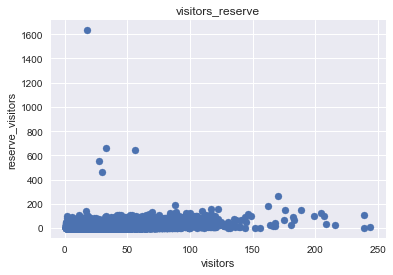

In [417]:
plt.scatter(air_visit["visitors"],air_visit["reserve_visitors"])
plt.ylabel("reserve_visitors")
plt.xlabel("visitors")
plt.title("visitors_reserve")

このように見ると明らかにおかしい事になっているのが分かりました。  
これは値を処理してあげましょう。

In [418]:
air_visit[(air_visit["reserve_visitors"] > 400)]

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,prefecture,ward,town,weather,day_of_week,holiday_flg,rest
165585,air_e7fbee4e3cfe65c5,2017-02-03,33.0,664.0,Izakaya,Niigata-ken Niigata-shi Gakkōchōdōri 1 Banchō,37.916367,139.036327,Niigata-ken,Niigata-shi,Gakkōchōdōri,0.0,Friday,0,0
166363,air_e7fbee4e3cfe65c5,2017-02-04,56.0,641.0,Izakaya,Niigata-ken Niigata-shi Gakkōchōdōri 1 Banchō,37.916367,139.036327,Niigata-ken,Niigata-shi,Gakkōchōdōri,0.0,Saturday,0,1
167121,air_e7fbee4e3cfe65c5,2017-02-05,18.0,1633.0,Izakaya,Niigata-ken Niigata-shi Gakkōchōdōri 1 Banchō,37.916367,139.036327,Niigata-ken,Niigata-shi,Gakkōchōdōri,3.5,Sunday,0,1
168359,air_e7fbee4e3cfe65c5,2017-02-07,27.0,557.0,Izakaya,Niigata-ken Niigata-shi Gakkōchōdōri 1 Banchō,37.916367,139.036327,Niigata-ken,Niigata-shi,Gakkōchōdōri,0.5,Tuesday,0,0
247840,air_465bddfed3353b23,2017-01-09,30.0,466.0,Dining bar,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya,5.5,Monday,1,1
264947,air_a17f0778617c76e2,2017-05-08,NaN,511.0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri,0.0,Monday,0,0


この数件は実際に来店している人数に修正します。

In [419]:
air_visit["reserve_visitors"][(air_visit["reserve_visitors"] == 511)] =35
air_visit["reserve_visitors"][(air_visit["reserve_visitors"] == 466)] =  30
air_visit["reserve_visitors"][(air_visit["reserve_visitors"] == 557)] = 27
air_visit["reserve_visitors"][(air_visit["reserve_visitors"] == 641)] = 56
air_visit["reserve_visitors"][(air_visit["reserve_visitors"] == 1633)] = 18
air_visit["reserve_visitors"][(air_visit["reserve_visitors"] == 664)]= 33


/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

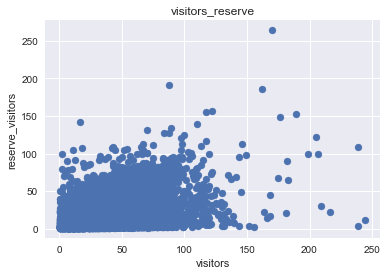

In [420]:
plt.scatter(air_visit["visitors"],air_visit["reserve_visitors"])
plt.ylabel("reserve_visitors")
plt.xlabel("visitors")
plt.title("visitors_reserve")

このように見てみると予約してるのに行ってない人が結構いる事がわかりました。  
予約して行けない場合はしっかりキャンセルの連絡をしましょう。  

数値データと来店数がどのくらい相関があるか見ていきましょう。

In [421]:
air_visit.corr()

,visitors,reserve_visitors,latitude,longitude,weather,holiday_flg,rest
visitors,1.000000,0.525669,0.000018,-0.007328,-0.043685,0.037634,0.164032
reserve_visitors,0.525669,1.000000,0.069327,-0.007587,-0.006961,0.013436,0.083894
latitude,0.000018,0.069327,1.000000,0.651720,-0.012396,0.002442,0.002488
longitude,-0.007328,-0.007587,0.651720,1.000000,-0.010123,-0.009539,-0.013937
weather,-0.043685,-0.006961,-0.012396,-0.010123,1.000000,-0.020295,-0.031656
holiday_flg,0.037634,0.013436,0.002442,-0.009539,-0.020295,1.000000,0.357173
rest,0.164032,0.083894,0.002488,-0.013937,-0.031656,0.357173,1.000000


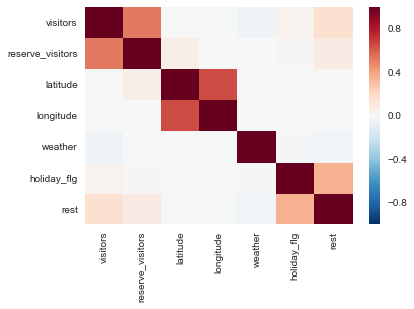

In [422]:
sns.heatmap(air_visit.corr())

reserve_visitorsとrestに少し相関が見る事ができました。  
他のカテゴリデータなども見ていきましょう。  
まず曜日でどのくらいの差があるか見ていきます。

In [423]:
air_visit.sort_values(by = "air_area_name")

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,prefecture,ward,town,weather,day_of_week,holiday_flg,rest
73199,air_0585011fa179bcce,2016-09-01,4.0,NaN,Dining bar,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,0.0,Thursday,0,0
174603,air_f6cdaf7b7fdc6d78,2017-02-16,1.0,NaN,Italian/French,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,0.0,Thursday,0,0
214386,air_c77ee2b7d36da265,2017-04-17,33.0,NaN,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,77.5,Monday,0,0
121725,air_a1fe8c588c8d2f30,2016-11-19,18.0,NaN,Bar/Cocktail,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,22.5,Saturday,0,1
121724,air_5878b6f2a9da12c1,2016-11-19,21.0,NaN,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,22.5,Saturday,0,1
270924,air_eb5788dba285e725,2017-05-15,NaN,NaN,Other,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,0.0,Monday,0,0
121723,air_ad13e71e21235131,2016-11-19,17.0,NaN,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,22.5,Saturday,0,1
270929,air_eca5e0064dc9314a,2017-05-15,NaN,NaN,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,0.0,Monday,0,0
142195,air_af63df35857b16e6,2016-12-22,25.0,17.0,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,14.5,Thursday,0,0
151010,air_9828505fefc77d75,2017-01-12,13.0,NaN,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,0.0,Thursday,0,0


In [424]:
# air_visit["visit_datetime"] = v_day
air_visit = air_visit.set_index(air_visit["visit_datetime"])

In [425]:
week_list = []
for i in range(7):
    gest = air_visit[(air_visit.index.weekday == i)]["visitors"].sum()
    week_list.append(gest)
week_list = pd.DataFrame(week_list)
week_list.index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

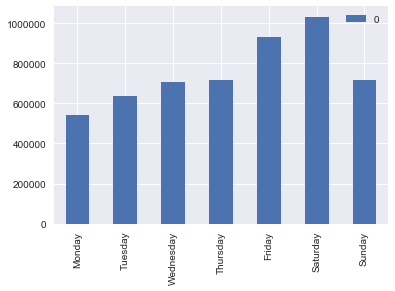

In [426]:
week_list.plot.bar()

日曜日と月曜日が少ない事がわかりました。    
これは意外でした。

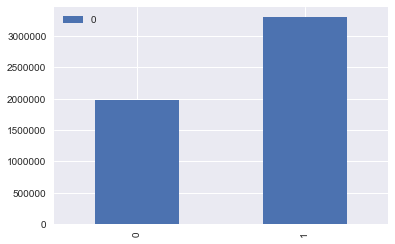

In [427]:
pd.DataFrame([air_visit[(air_visit["rest"]==1)]["visitors"].sum(),air_visit[(air_visit["rest"]==0)]["visitors"].sum()]).plot.bar()

こちらも面白い結果が出ました。  
日曜日は来店者が少ないですが、祝日や休日の方が人が倍近く多いです。


## 時系列データの注意点
時系列データを扱う際は**トレンド**を合わせる事が大切です。  
理由として、季節や曜日、時間によって状況は大きく異なります。  
しかし日付データだけでは何月か？などは学習してくれません。  
その為、日付データから月と季節を新しい特徴として加えましょう。

In [428]:
air_month = air_visit.index.month

air_visit["month"] = air_month
air_visit["season"] = air_month

month = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

season = {1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",
         6:"Summer",7:"Summer",8:"Summer",9:"Autumn",10:"Autumn",11:"Autumn",12:"Winter"}

air_visit["month"] = air_visit["month"].map(month)
air_visit["season"] = air_visit["season"].map(season)


In [429]:
air_visit.head()

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,prefecture,ward,town,weather,day_of_week,holiday_flg,rest,month,season
visit_datetime,,,,,,,,,,,,,,,,,
2016-01-13,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0.0,Wednesday,0,0,Jan,Winter
2016-01-13,air_25e9888d30b386df,2016-01-13,21.0,NaN,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,Tōkyō-to,Shinagawa-ku,Higashigotanda,0.0,Wednesday,0,0,Jan,Winter
2016-01-13,air_fd6aac1043520e83,2016-01-13,40.0,NaN,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0.0,Wednesday,0,0,Jan,Winter
2016-01-13,air_64d4491ad8cdb1c6,2016-01-13,5.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,0.0,Wednesday,0,0,Jan,Winter
2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18.0,NaN,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,0.0,Wednesday,0,0,Jan,Winter


## 特徴量を増やす
今回は決定木を使いたいので、特徴量を増やし、分岐を多くさせます。  
kaggleでよく使われる手法で、平均、最高値、最小値などを新たな特徴として増やしていきます。

In [430]:
air_des = air_des.drop("reserve_datetime",axis = 1)

In [431]:
air_des_list =air_des. groupby(["air_store_id"]).mean().reset_index()
air_des_list["reserve_visitors_sum"] = air_des. groupby(["air_store_id"]).sum().reset_index()["reserve_visitors"]
air_des_list = air_des_list.rename(columns={'reserve_visitors': 'reserve_visitors_mean'})
air_des_list["reserve_visitors_max"] = air_des. groupby(["air_store_id"]).max().reset_index()["reserve_visitors"]
air_des_list["reserve_visitors_min"] = air_des. groupby(["air_store_id"]).min().reset_index()["reserve_visitors"]

In [432]:
air_visit = pd.merge(air_visit,air_des_list, on = "air_store_id",how = "left")

In [433]:
air_visit.isnull().sum()

air_store_id                  0
visit_datetime                0
visitors                  32019
reserve_visitors         247160
air_genre_name                0
air_area_name                 0
latitude                      0
longitude                     0
prefecture                    0
ward                          0
town                          0
weather                       0
day_of_week                   0
holiday_flg                   0
rest                          0
month                         0
season                        0
reserve_visitors_mean    168106
reserve_visitors_sum     168106
reserve_visitors_max     168106
reserve_visitors_min     168106
dtype: int64

特徴量を増やすことはできましたが、半分くらいが欠損で良い精度が出るとは思えません。  
その為、hpgのデータをさらに使っていきたいと思います。  
場所とレストランの種類が同じ場合は予約の平均などを入れましょう。  
その為hpgのデータも綺麗にしていきます。

In [434]:
hpg_data = hpg_reserve.copy()
hpg_data["visit_datetime"] = hpg_data["visit_datetime"].str.split(' ', expand=True)[0]

In [435]:
set(hpg_store_info["hpg_genre_name"]),set(air_visit["air_genre_name"])

({'Amusement bar',
  'Bar/Cocktail',
  'Bistro',
  'Cafe',
  'Cantonese food',
  'Chinese general',
  'Creation',
  'Creative Japanese food',
  'Dim Sum/Dumplings',
  'French',
  'Grilled meat',
  'International cuisine',
  'Italian',
  'Japanese cuisine/Kaiseki',
  'Japanese food in general',
  'Japanese style',
  'Karaoke',
  'Korean cuisine',
  'Okonomiyaki/Monja/Teppanyaki',
  'Party',
  'Pasta/Pizza',
  'Seafood',
  'Shabu-shabu/Sukiyaki',
  'Shanghai food',
  'Sichuan food',
  'Spain Bar/Italian Bar',
  'Spain/Mediterranean cuisine',
  'Steak/Hamburger/Curry',
  'Sushi',
  'Sweets',
  'Taiwanese/Hong Kong cuisine',
  'Thai/Vietnamese food',
  'Udon/Soba',
  'Western food'},
 {'Asian',
  'Bar/Cocktail',
  'Cafe/Sweets',
  'Creative cuisine',
  'Dining bar',
  'International cuisine',
  'Italian/French',
  'Izakaya',
  'Japanese food',
  'Karaoke/Party',
  'Okonomiyaki/Monja/Teppanyaki',
  'Other',
  'Western food',
  'Yakiniku/Korean food'})

hpgのデータとairのデータでレストランの種類が違う事がわかりました。  
これではマージできないので、変換して合わせましょう！

In [436]:
hpg_lest = {'Amusement bar':"Bar/Cocktail",
  'Bar/Cocktail':"Bar/Cocktail",
  'Bistro':"Dining bar",
  'Cafe':"Cafe/Sweets",
  'Cantonese food':"Asian",
  'Chinese general':"Asian",
  'Creation':"'Creative cuisine'",
  'Creative Japanese food':'Creative cuisine',
  'Dim Sum/Dumplings':"Asian",
  'French':'Italian/French',
  'Grilled meat': 'Western food',
  'International cuisine':'International cuisine',
  'Italian':'Italian/French',
  'Japanese cuisine/Kaiseki':'Japanese food',
  'Japanese food in general':'Izakaya',
  'Japanese style':'Japanese food',
  'Karaoke':'Karaoke/Party',
  'Korean cuisine':'Yakiniku/Korean food',
  'Okonomiyaki/Monja/Teppanyaki':'Okonomiyaki/Monja/Teppanyaki',
  'Party':'Karaoke/Party',
  'Pasta/Pizza':'Italian/French',
  'Seafood':'Other',
  'Shabu-shabu/Sukiyaki':'Japanese food',
  'Shanghai food':"Asian",
  'Sichuan food':"Asian",
  'Spain Bar/Italian Bar':'International cuisine',
  'Spain/Mediterranean cuisine':"International cuisine",
  'Steak/Hamburger/Curry':"'Western food'",
  'Sushi':'Japanese food',
  'Sweets':"Cafe/Sweets",
  'Taiwanese/Hong Kong cuisine':"Asian",
  'Thai/Vietnamese food':"Asian",
  'Udon/Soba':"Japanese food",
  'Western food':'Western food'}

In [437]:
hpg_datas = hpg_data.groupby(["hpg_store_id","visit_datetime"]).mean().reset_index()
hpg_datas = pd.merge(hpg_datas ,hpg_store_info,on ="hpg_store_id",how = "left")
hpg_datas["hpg_genre_name"] = hpg_datas["hpg_genre_name"].map(hpg_lest)
hpg_datas = hpg_datas.drop(["hpg_store_id","hpg_area_name","latitude","longitude"],axis = 1)
hpg_datas["visit_datetime"] = pd.to_datetime(hpg_datas["visit_datetime"])

In [438]:
hpg_datas = hpg_datas.rename(columns={'hpg_genre_name': 'air_genre_name',"reserve_visitors":"hpg_reserve_visitors"})

In [439]:
hpg_datas = hpg_datas.groupby(["visit_datetime","air_genre_name"]).sum().reset_index()
air_visit = pd.merge(air_visit,hpg_datas,on = ["visit_datetime","air_genre_name"],how = "left")

特徴量を増やす事ができたので、一度相関を見ていきましょう。

In [440]:
air_visit.corr()

,visitors,reserve_visitors,latitude,longitude,weather,holiday_flg,rest,reserve_visitors_mean,reserve_visitors_sum,reserve_visitors_max,reserve_visitors_min,hpg_reserve_visitors
visitors,1.000000,0.525669,0.000018,-0.007328,-0.043685,0.037634,0.164032,0.133283,0.222521,0.226628,-0.029695,0.022386
reserve_visitors,0.525669,1.000000,0.069327,-0.007587,-0.006961,0.013436,0.083894,0.260292,0.401035,0.288593,0.083321,0.074824
latitude,0.000018,0.069327,1.000000,0.651720,-0.012396,0.002442,0.002488,0.077169,0.088945,0.069983,0.049583,0.017785
longitude,-0.007328,-0.007587,0.651720,1.000000,-0.010123,-0.009539,-0.013937,0.056490,-0.094409,-0.153222,0.145546,0.024014
weather,-0.043685,-0.006961,-0.012396,-0.010123,1.000000,-0.020295,-0.031656,0.000368,0.005342,0.001673,-0.005035,-0.013114
holiday_flg,0.037634,0.013436,0.002442,-0.009539,-0.020295,1.000000,0.357173,0.000043,0.005156,0.008407,-0.000703,-0.013342
rest,0.164032,0.083894,0.002488,-0.013937,-0.031656,0.357173,1.000000,-0.000594,0.006093,0.015558,-0.004390,0.001853
reserve_visitors_mean,0.133283,0.260292,0.077169,0.056490,0.000368,0.000043,-0.000594,1.000000,0.067822,0.476036,0.411854,-0.082700
reserve_visitors_sum,0.222521,0.401035,0.088945,-0.094409,0.005342,0.005156,0.006093,0.067822,1.000000,0.527768,-0.234776,0.015127
reserve_visitors_max,0.226628,0.288593,0.069983,-0.153222,0.001673,0.008407,0.015558,0.476036,0.527768,1.000000,-0.163263,-0.079679


相関のありそうなデータを作る事ができました。  
予約者の合計や最高値が来店者を説明している事がわかりました。

# 予測データの作成
今回の予測するデータは、このデータに入っていない未来の事柄です。  
その為、昨年のデータを代わりに使い代入しましょう。  

In [441]:
sample_future = air_visit[(air_visit["visit_datetime"] >= "2016-04-24")& (air_visit["visit_datetime"] <= "2016-06-01")]  
import datetime
sample_future["visit_datetime"] = sample_future["visit_datetime"] + datetime.timedelta(days=364)

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [442]:
sample_f = sample_future[["air_store_id","visit_datetime","reserve_visitors"]]

In [443]:
train_data = pd.merge(air_visit,sample_f,on = ["air_store_id","visit_datetime"],how = "left")

In [444]:
train_data["reserve_visitors"] = train_data["reserve_visitors_x"].fillna(0) + train_data["reserve_visitors_y"].fillna(0)
train_data = train_data.drop(["reserve_visitors_x","reserve_visitors_y"],axis = 1)

In [445]:
train_data["reserve_visitors"] = train_data["reserve_visitors"].replace(0,np.nan)

## データを直す  
学習できるようにデータを直しましょう。  
決定木では文字列をカテゴリー型に直す必要があります。  
日付のデータは削除し、他のデータはカテゴリに直しましょう。  

In [446]:
train_data = train_data.drop(["visit_datetime"],axis = 1)

In [447]:
def ch_category(data):
    
    for col in data:
        if data[col].dtype == "object":
            data[col] = data[col].astype('category')
        if data[col].dtype == "datetime64[ns]":
            data[col] = data[col].astype('category')
    return data

In [448]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def les(data):
    
    for col in data:
        if data[col].dtype == "object":
            if len(list(data[col].unique())) <= 2:
                le.fit(data[col])
            
                data[col] = le.transform(data[col])
                
    data = pd.get_dummies(data)
    return data

In [449]:
#train_data = ch_category(train_data)
store_id = train_data["air_store_id"]
train_data = train_data.drop("air_store_id",axis =1)
train_data = les(train_data)
train_data["air_store_id"] = store_id

In [450]:
sub_data = train_data[(train_data["visitors"].isnull())]

In [451]:
train_data

,visitors,latitude,longitude,weather,holiday_flg,rest,reserve_visitors_mean,reserve_visitors_sum,reserve_visitors_max,reserve_visitors_min,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_Autumn,season_Spring,season_Summer,season_Winter,air_store_id
0,25.0,35.658068,139.751599,0.0,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_ba937bf13d40fb24
1,21.0,35.626568,139.725858,0.0,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_25e9888d30b386df
2,40.0,35.658068,139.751599,0.0,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_fd6aac1043520e83
3,5.0,35.658068,139.751599,0.0,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_64d4491ad8cdb1c6
4,18.0,34.710895,137.725940,0.0,0,0,2.331325,1548.0,16.0,1.0,...,0,0,0,0,0,0,0,0,1,air_ee3a01f0c71a769f
5,24.0,33.589216,130.392813,2.5,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_9438d67241c81314
6,9.0,34.720228,135.265455,0.5,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_d0e8a085d8dc83aa
7,16.0,35.661777,139.704051,0.0,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_5c65468938c07fa5
8,5.0,35.641463,139.698171,0.0,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,air_9fc607777ad76b26
9,9.0,34.975140,138.383243,0.0,0,0,5.760530,7385.0,51.0,1.0,...,0,0,0,0,0,0,0,0,1,air_326ca454ef3558bc


In [452]:
target = train_data["visitors"].dropna()
train = train_data.dropna(subset=['visitors']).drop(["visitors","air_store_id"],axis = 1)

In [453]:
sub_data = sub_data.sort_values(by = "air_store_id")

In [454]:
print(train.shape,target.shape,sub_data.shape)

(252108, 314) (252108,) (32019, 316)


In [455]:
train.shape

(252108, 314)

これで学習できる形になりました。

# ハイパーパラメーターチューニング
今回はグリッドサーチ ではなく、Bayesian Hyperparameter Optimizationを使ってパラメーターチューニングを行います。  
なお使うモデルはlight gbmを予定しています。  
ベイジアン統計的方法は、新しいデータを取得した後にベイズの定理を使用して確率を計算し、更新する手法のことをいいます。  
グリッドサーチ と違い、短時間で最適なパラメーターを見つける事ができるのが特徴です。

In [456]:
from optml.bayesian_optimizer import BayesianOptimizer

In [457]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

###############################################
# Import Miscellaneous Assets
###############################################
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
from functools import partial
from pprint import pprint as pp
from tqdm import tqdm, tqdm_notebook


In [458]:
CROSS_VALIDATION_PARAMS = dict(n_splits=5, shuffle=True, random_state=32)
XGBOOST_REGRESSOR_PARAMS = dict(
    learning_rate=0.2, n_estimators=200, subsample=0.8, colsample_bytree=0.8, 
    max_depth=10, n_jobs=-1
)

BAYESIAN_OPTIMIZATION_MAXIMIZE_PARAMS = dict(
    init_points=1,  # init_points=20,
    n_iter=2,  # n_iter=60,
    acq='poi', xi=0.0
)
BAYESIAN_OPTIMIZATION_BOUNDARIES = dict(
    max_depth=(5, 12.99),
    gamma=(0.01, 5),
    min_child_weight=(0, 6),
    scale_pos_weight=(1.2, 5),
    reg_alpha=(4.0, 10.0),
    reg_lambda=(1.0, 10.0),
    max_delta_step=(0, 5),
    subsample=(0.5, 1.0),
    colsample_bytree=(0.3, 1.0),
    learning_rate=(0.0, 1.0)
)
BAYESIAN_OPTIMIZATION_INITIAL_SEARCH_POINTS = dict(
    max_depth=[5, 10],
    gamma=[0.1511, 3.8463],
    min_child_weight=[2.4073, 4.9954],
    scale_pos_weight=[2.2281, 4.0345],
    reg_alpha=[8.0702, 9.0573],
    reg_lambda=[2.0126, 3.5934],
    max_delta_step=[1, 2],
    subsample=[0.8, 0.8234],
    colsample_bytree=[0.8, 0.7903],
    learning_rate=[0.2, 0.1]
)

reserve_features = [
    'rs1_x', 'rs1_y', 'rs2_x', 'rs2_y', 'rv1_x', 'rv1_y', 'rv2_x', 'rv2_y',
    'total_reserve_dt_diff_mean', 'total_reserve_mean', 'total_reserve_sum'
]

BASE_ESTIMATOR = partial(XGBRegressor)

In [459]:
def search_node(**kwargs):
    # global train_df, test_df, train_input, oof, test_predictions, best_round, target
    global train, target

    ###############################################
    # Unify Parameters
    ###############################################
    received_params = dict(dict(
        n_estimators=200,
    ), **{_k: _v if _k not in ('max_depth') else int(_v) for _k, _v in kwargs.items()})
    
    current_params = dict(XGBOOST_REGRESSOR_PARAMS, **received_params)

    ###############################################
    # Initialize Folds and Result Placeholders
    ###############################################
    folds = KFold(**CROSS_VALIDATION_PARAMS)
    evaluation = np.zeros((current_params['n_estimators'], CROSS_VALIDATION_PARAMS['n_splits']))
    oof_predictions = np.empty(len(train))
    np.random.seed(32)

    progress_bar = tqdm_notebook(
        enumerate(folds.split(target, target)), 
        total=CROSS_VALIDATION_PARAMS['n_splits'], 
        leave=False
    )
    
    ###############################################
    # Begin Cross-Validation
    ###############################################
    for fold, (train_index, validation_index) in progress_bar:
        train_input, validation_input = train.iloc[train_index], train.iloc[validation_index]
        train_target, validation_target = target.iloc[train_index], target.iloc[validation_index]

        ###############################################
        # Initialize and Fit Model With Current Parameters
        ###############################################
        model = BASE_ESTIMATOR(**current_params)
        eval_set = [(train_input, train_target), (validation_input, validation_target)]
        model.fit(train_input, train_target, eval_set=eval_set, verbose=False)

        ###############################################
        # Find Best Round for Validation Set
        ###############################################
        evaluation[:, fold] = model.evals_result_["validation_1"]['rmse']
        best_round = np.argsort(evaluation[:, fold])[0]

        progress_bar.set_description('Fold #{}:   {:.5f}'.format(
            fold, evaluation[:, fold][best_round]
        ), refresh=True)

    ###############################################
    # Compute Mean and Standard Deviation of RMSLE
    ###############################################
    mean_eval, std_eval = np.mean(evaluation, axis=1), np.std(evaluation, axis=1)
    best_round = np.argsort(mean_eval)[0]
    search_value = mean_eval[best_round]

    ###############################################
    # Update Best Score and Return Negative Value
    # In order to minimize error, instead of maximizing accuracy
    ###############################################
    print(' Stopped After {} Epochs... Validation RMSLE: {:.6f} +- {:.6f}'.format(
        best_round, search_value, std_eval[best_round]
    ))

    return -search_value

1回やるのに２時間ほどかかるので、エラー出ていますが1度回してます

In [460]:
bayes_opt = BayesianOptimization(search_node, BAYESIAN_OPTIMIZATION_BOUNDARIES)
bayes_opt.explore(BAYESIAN_OPTIMIZATION_INITIAL_SEARCH_POINTS)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    bayes_opt.maximize(**BAYESIAN_OPTIMIZATION_MAXIMIZE_PARAMS)

Initialization
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_delta_step |   max_depth |   min_child_weight |   reg_alpha |   reg_lambda |   scale_pos_weight |   subsample | 


KeyboardInterrupt: 

Initialization
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_delta_step |   max_depth |   min_child_weight |   reg_alpha |   reg_lambda |   scale_pos_weight |   subsample | 
 Stopped After 104 Epochs... Validation RMSLE: 16.634464 +- 0.335124
    1 | 08m15s |  -16.63446 |             0.8000 |    0.1511 |          0.2000 |           1.0000 |      5.0000 |             2.4073 |      8.0702 |       2.0126 |             2.2281 |      0.8000 | 
 Stopped After 105 Epochs... Validation RMSLE: 16.598551 +- 0.336169
    2 | 14m03s |  -16.59855 |             0.7903 |    3.8463 |          0.1000 |           2.0000 |     10.0000 |             4.9954 |      9.0573 |       3.5934 |             4.0345 |      0.8234 | 
 Stopped After 111 Epochs... Validation RMSLE: 16.600626 +- 0.334702
    3 | 12m19s |  -16.60063 |             0.7345 |    0.8518 |          0.2339 |           0.8071 |      9.1994 |             5.8878 |      4.1023 |       7.5412 |             1.5047 |      0.7446 | 
Bayesian Optimization
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   learning_rate |   max_delta_step |   max_depth |   min_child_weight |   reg_alpha |   reg_lambda |   scale_pos_weight |   subsample | 
 Stopped After 199 Epochs... Validation RMSLE: 17.226378 +- 0.340905
    4 | 09m56s |  -17.22638 |             0.6243 |    4.9973 |          0.0281 |           2.8967 |     12.8728 |             6.0000 |      8.5034 |       4.8948 |             4.6959 |      0.8206 | 
 Stopped After 89 Epochs... Validation RMSLE: 16.622471 +- 0.331784
    5 | 08m25s |  -16.62247 |             0.5327 |    3.9207 |          0.1168 |           2.0084 |      7.4980 |             4.4574 |      9.9098 |       1.7978 |             4.6770 |      0.8000 | 

ハイパーパラメーターチューニングが終わりました。  
上記のパラメーターを使って学習をしていきましょう。  
今回使うrmsleを関数化します。

In [461]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

# 学習   
上ではXGBoostを使いましたが、同じブースティングのlight GBMを使って学習します。

In [465]:
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size = 0.2)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
watchlist = [lgb_train,lgb_eval]
params = {}
params['application'] = 'regression'
params['boosting'] = 'gbdt'
params['learning_rate'] = 0.1181
params['gamma'] = 4.9973
params['nax_depth'] = 7.4980
params["max_delta_step"] = 2
params["min_child_weight"] = 4.4
params["reg_alpha"]  = 9.9
params["reg_lambda"] = 4.8
params['num_leaves'] = 32
params['min_sum_hessian_in_leaf'] = 1e-2
params['min_gain_to_split'] = 0
params["n_estimators"] = 2000
params['bagging_fraction'] = 0.8
params['feature_fraction'] = 0.8
params['num_threads'] = 5
params['metric'] = 'rmse'

lgb_model1 = lgb.train(params, train_set=lgb_train, num_boost_round=2000, valid_sets=watchlist, \
verbose_eval=100)

# # train
# gbm = lgb.train(params,
#             lgb_train,
#             num_boost_round=1000,
#             valid_sets=lgb_eval,
#             early_stopping_rounds=100,)
# y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	training's rmse: 14.0734	valid_1's rmse: 13.602
[200]	training's rmse: 13.5124	valid_1's rmse: 13.0496
[300]	training's rmse: 13.1906	valid_1's rmse: 12.7477
[400]	training's rmse: 13.019	valid_1's rmse: 12.5945
[500]	training's rmse: 12.8671	valid_1's rmse: 12.4731
[600]	training's rmse: 12.7531	valid_1's rmse: 12.402
[700]	training's rmse: 12.6584	valid_1's rmse: 12.3474
[800]	training's rmse: 12.574	valid_1's rmse: 12.3029
[900]	training's rmse: 12.5093	valid_1's rmse: 12.2826
[1000]	training's rmse: 12.4551	valid_1's rmse: 12.2701
[1100]	training's rmse: 12.3849	valid_1's rmse: 12.2376
[1200]	training's rmse: 12.3325	valid_1's rmse: 12.2241
[1300]	training's rmse: 12.2603	valid_1's rmse: 12.1879
[1400]	training's rmse: 12.2131	valid_1's rmse: 12.1736
[1500]	training's rmse: 12.1608	valid_1's rmse: 12.1609
[1600]	training's rmse: 12.1161	valid_1's rmse: 12.1583
[1700]	training's rmse: 12.0804	valid_1's rmse: 12.1625
[1800]	training's rmse: 12.0398	valid_1's rmse: 12.1601
[1900

In [466]:
pred = lgb_model1.predict(x_test)

In [467]:
print(rmsle(pred,y_test))

0.6400824046455342


/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


学習の結果が出ました。  
残念ながら目標のスコアは出ませんでしたが、EDAから学習までをしっかりできたかと思います。

In [468]:
pred = lgb_model1.predict(sub_data.drop(["air_store_id","visitors"],axis = 1))

In [469]:
sample_submission["visitors"] = pred

In [470]:
sample_submission.to_csv("sub.csv",index=False)

# 時系列交差検証
時系列データの検証には、時系列検証が効果的です。  
最後に時系列データの検証を行いましょう。

In [471]:
air_visit.head()

,air_store_id,visit_datetime,visitors,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,prefecture,ward,...,day_of_week,holiday_flg,rest,month,season,reserve_visitors_mean,reserve_visitors_sum,reserve_visitors_max,reserve_visitors_min,hpg_reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,...,Wednesday,0,0,Jan,Winter,NaN,NaN,NaN,NaN,16.0
1,air_25e9888d30b386df,2016-01-13,21.0,NaN,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,Tōkyō-to,Shinagawa-ku,...,Wednesday,0,0,Jan,Winter,NaN,NaN,NaN,NaN,52.0
2,air_fd6aac1043520e83,2016-01-13,40.0,NaN,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,...,Wednesday,0,0,Jan,Winter,NaN,NaN,NaN,NaN,52.0
3,air_64d4491ad8cdb1c6,2016-01-13,5.0,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,...,Wednesday,0,0,Jan,Winter,NaN,NaN,NaN,NaN,16.0
4,air_ee3a01f0c71a769f,2016-01-13,18.0,NaN,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Shizuoka-ken,Hamamatsu-shi,...,Wednesday,0,0,Jan,Winter,2.331325,1548.0,16.0,1.0,4.0


In [483]:
air_visit = air_visit.sort_values(by = "visit_datetime")
train_data = air_visit.drop("air_store_id",axis =1)
train_data["air_store_id"] = store_id
target = train_data["visitors"].dropna()
train = train_data.dropna(subset=['visitors']).drop(["visitors","air_store_id","visit_datetime"],axis = 1)

In [484]:
train = train.reset_index()
target = target.reset_index()
target = target.drop("index",axis = 1)

In [ ]:
model = lgb.LGBMRegressor()

In [521]:
model = lgb.LGBMRegressor(application = "regression",learning_rate= 0.1181,gamma = 4.9973
                         ,nax_depth = 7.4980,max_delta_step = 2,min_child_weight = 4.4,num_leaves = 32,n_estimators = 2000,num_threads = 5
                         ,metric = 'rmse')

In [522]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(train.values,target.values):
    
    X_train, X_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = target.loc[train_index]["visitors"], target.loc[test_index]["visitors"]
    X_train = ch_category(pd.DataFrame(X_train))
    X_test = ch_category(pd.DataFrame(X_test))
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(rmsle(pred,y_test))
    
    
    

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


0.707223201351588


/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


0.6860670313910738
0.6884868073469308


/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


In [128]:
sub_sample = air_visit[(air_visit["visitors"].isnull())].sort_values(by = "air_store_id")

過学習していない事が確認できました。

# 実験
無いデータを1年追加しなかった場合

In [146]:
traget2 = air_visit["visitors"].dropna()
air_test = air_visit.drop(["air_store_id","visit_datetime","latitude","longitude"],axis = 1)

In [147]:
train2 = ch_category(air_test)

In [148]:
train2 = train2.dropna(subset=["visitors"])

In [149]:
train2 = train2.drop("visitors",axis = 1)

In [160]:
x_train,x_test,y_train,y_test = train_test_split(train2,traget2,test_size = 0.2)
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
watchlist = [lgb_train,lgb_eval]
params = {}
params['application'] = 'regression'
params['boosting'] = 'gbdt'
params['learning_rate'] = 0.1181
params['gamma'] = 4.9973
params['nax_depth'] = 7.4980
params["max_delta_step"] = 2
params["min_child_weight"] = 4.4
params["reg_alpha"]  = 9.9
params["reg_lambda"] = 4.8
params['num_leaves'] = 32
params['min_sum_hessian_in_leaf'] = 1e-2
params['min_gain_to_split'] = 0
params["n_estimators"] = 2000
params['bagging_fraction'] = 0.8
params['feature_fraction'] = 0.8
params['num_threads'] = 5
params['metric'] = 'rmse'

lgb_model1 = lgb.train(params, train_set=lgb_train, num_boost_round=1600, valid_sets=watchlist, \
verbose_eval=100)

# # train
# gbm = lgb.train(params,
#             lgb_train,
#             num_boost_round=1000,
#             valid_sets=lgb_eval,
#             early_stopping_rounds=100,)
# y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)

/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/lightgbm/basic.py:685: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[100]	training's rmse: 12.9331	valid_1's rmse: 12.961
[200]	training's rmse: 12.5447	valid_1's rmse: 12.6905
[300]	training's rmse: 12.3369	valid_1's rmse: 12.5832
[400]	training's rmse: 12.1529	valid_1's rmse: 12.5086
[500]	training's rmse: 12.0294	valid_1's rmse: 12.4915
[600]	training's rmse: 11.9273	valid_1's rmse: 12.4875
[700]	training's rmse: 11.8301	valid_1's rmse: 12.4758
[800]	training's rmse: 11.7481	valid_1's rmse: 12.4834
[900]	training's rmse: 11.6791	valid_1's rmse: 12.4833
[1000]	training's rmse: 11.6176	valid_1's rmse: 12.4937
[1100]	training's rmse: 11.5425	valid_1's rmse: 12.5047
[1200]	training's rmse: 11.4356	valid_1's rmse: 12.505
[1300]	training's rmse: 11.3736	valid_1's rmse: 12.5215
[1400]	training's rmse: 11.302	valid_1's rmse: 12.5305
[1500]	training's rmse: 11.2515	valid_1's rmse: 12.5476
[1600]	training's rmse: 11.2074	valid_1's rmse: 12.5763
[1700]	training's rmse: 11.1418	valid_1's rmse: 12.5884
[1800]	training's rmse: 11.0595	valid_1's rmse: 12.5986
[190

In [161]:
pred = lgb_model1.predict(x_test)

In [162]:
print(rmsle(pred,y_test))

0.6486515887763586


/Users/ishikawaryuuichi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


In [153]:
sub_sample = sub_sample.drop(["air_store_id","visit_datetime","latitude","longitude","visitors"],axis = 1)

In [155]:
sub_sample = ch_category(sub_sample)

In [156]:
pred = lgb_model1.predict(sub_sample)

In [157]:
sample_submission["visitors"] = pred

In [159]:
sample_submission.to_csv("sub.csv",index=False)

あまり変わりませんでした。笑

以上でこのカーネルを終わりにしたいと思います。  
なかなか自分で意味があると思っていた特徴が活きなく残念でしたが、時系列データは細かくトレンドで分ける事で意味が出ることを知れたので今後も生かして活きたいです。